# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [1]:
!kaggle datasets download -d khaledzsa/bus-breakdown-and-delays
!unzip bus-breakdown-and-delays.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays
License(s): unknown
bus-breakdown-and-delays.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bus-breakdown-and-delays.zip
replace Bus_Breakdown_and_Delays.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Importing Libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder,MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import keras
import tensorflow as tf
from keras.optimizers import Adam

In [54]:
df = pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [5]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [7]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [8]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [9]:
df.shape

(147972, 21)

<Figure size 1200x1200 with 0 Axes>

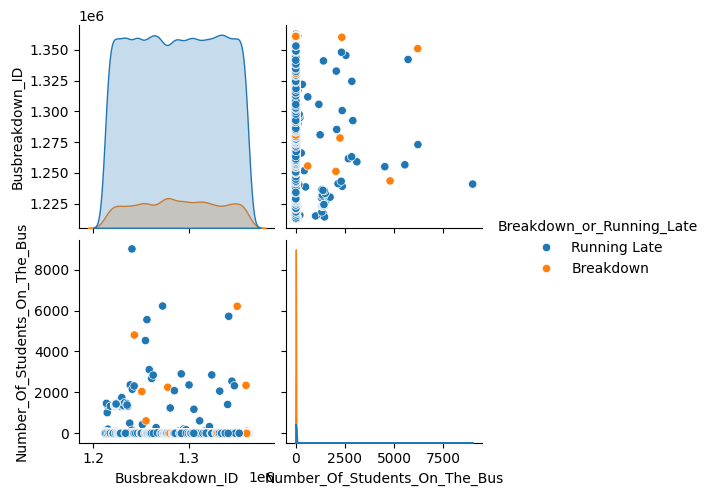

In [10]:
plt.figure(figsize=(12,12))
sns.pairplot(df, hue='Breakdown_or_Running_Late')

In [11]:
df['Breakdown_or_Running_Late'].value_counts()

,count
Breakdown_or_Running_Late,
Running Late,130857
Breakdown,17115


In [12]:
df['Breakdown_or_Running_Late'].unique()

array(['Running Late', 'Breakdown'], dtype=object)

<Axes: ylabel='Frequency'>

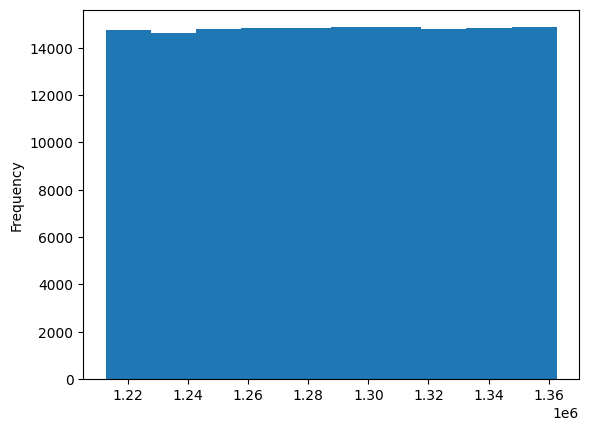

In [13]:
df['Busbreakdown_ID'].plot(kind='hist')

<Axes: ylabel='Frequency'>

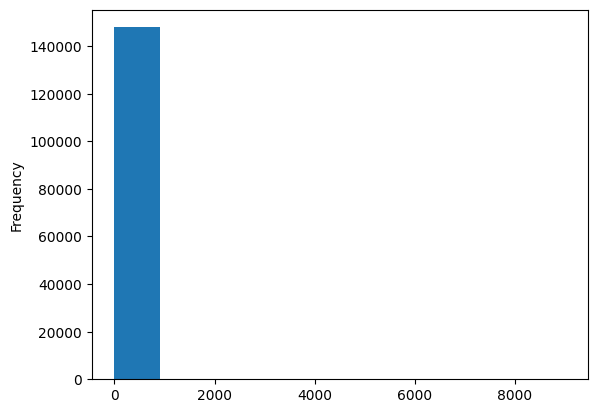

In [14]:
df['Number_Of_Students_On_The_Bus'].plot(kind='hist')

<Axes: xlabel='count', ylabel='School_Year'>

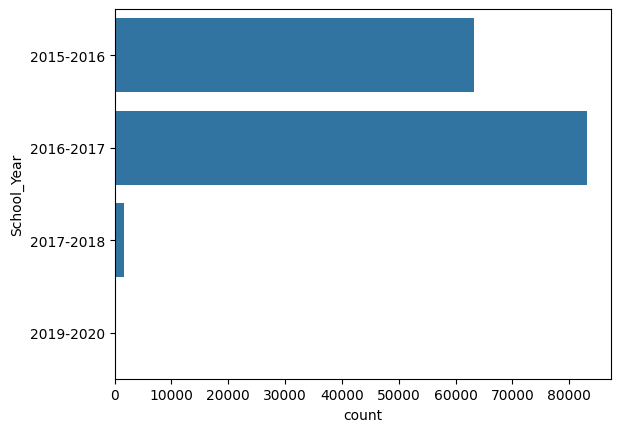

In [15]:
sns.countplot(df['School_Year'])

<Axes: xlabel='count', ylabel='Run_Type'>

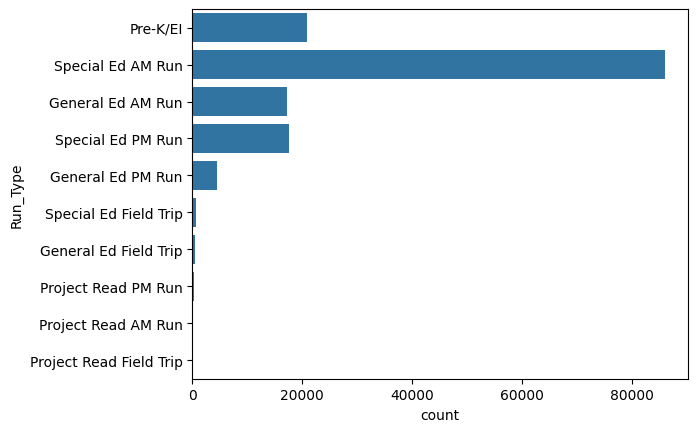

In [16]:
sns.countplot(df['Run_Type'])

<Axes: xlabel='count', ylabel='Reason'>

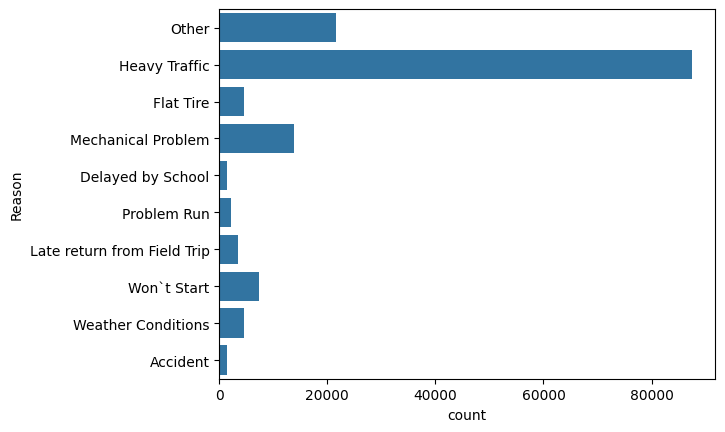

In [17]:
sns.countplot(df['Reason'])

<Axes: xlabel='count', ylabel='Breakdown_or_Running_Late'>

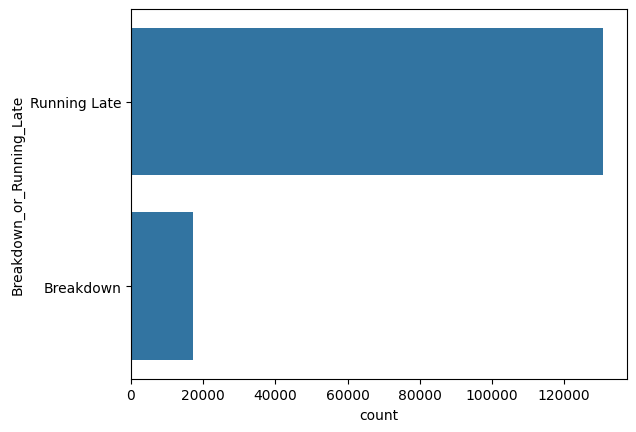

In [18]:
sns.countplot(df['Breakdown_or_Running_Late'])

<Axes: xlabel='count', ylabel='School_Age_or_PreK'>

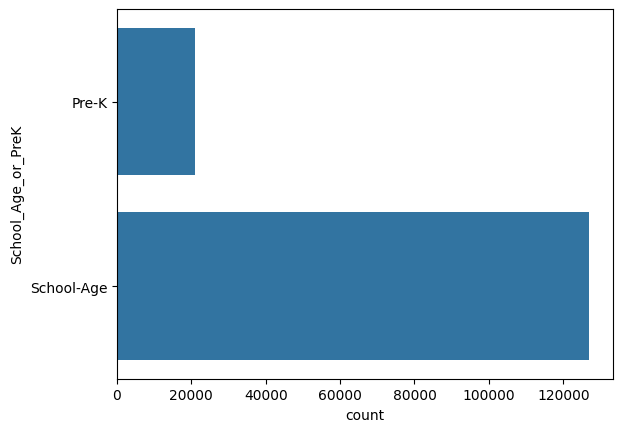

In [19]:
sns.countplot(df['School_Age_or_PreK'])

<Axes: xlabel='count', ylabel='Has_Contractor_Notified_Schools'>

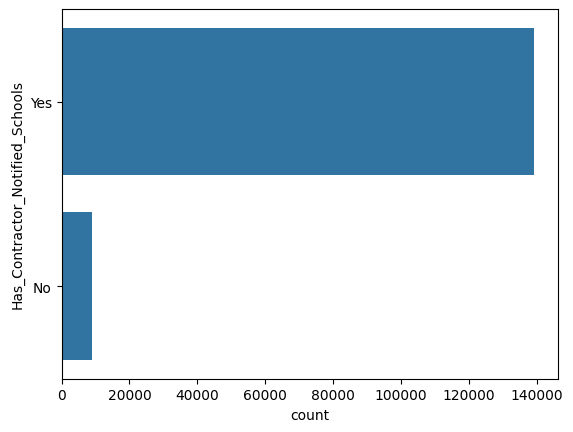

In [20]:
sns.countplot(df['Has_Contractor_Notified_Schools'])

<Axes: xlabel='count', ylabel='How_Long_Delayed'>

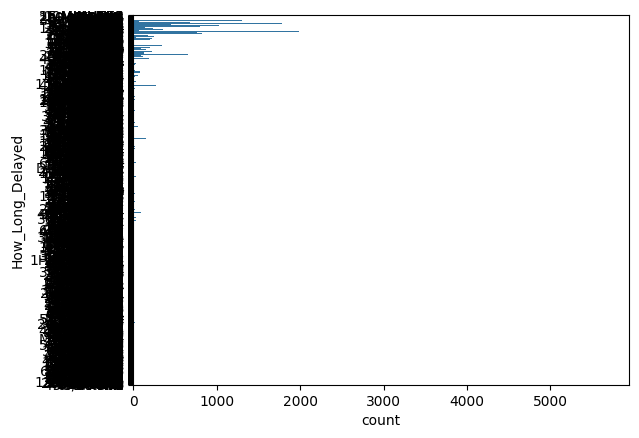

In [21]:
sns.countplot(df['How_Long_Delayed'])

<Axes: xlabel='count', ylabel='Has_Contractor_Notified_Parents'>

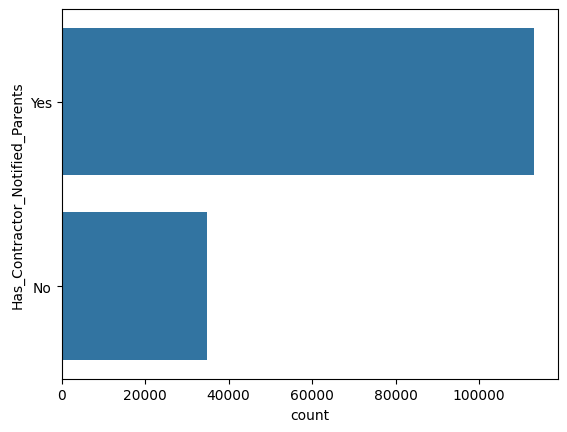

In [23]:
sns.countplot(df['Has_Contractor_Notified_Parents'])

<Axes: xlabel='count', ylabel='Have_You_Alerted_OPT'>

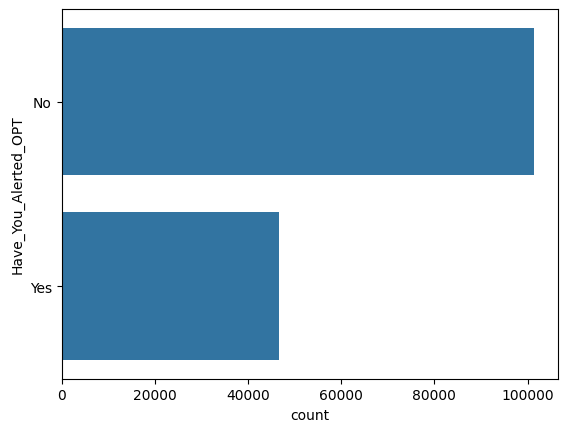

In [24]:
sns.countplot(df['Have_You_Alerted_OPT'])

In [55]:
num_col = df.select_dtypes(exclude=['object']).columns
corr_matrix = df[num_col].corr()
corr_matrix


,Busbreakdown_ID,Number_Of_Students_On_The_Bus
Busbreakdown_ID,1.000000,-0.016243
Number_Of_Students_On_The_Bus,-0.016243,1.000000


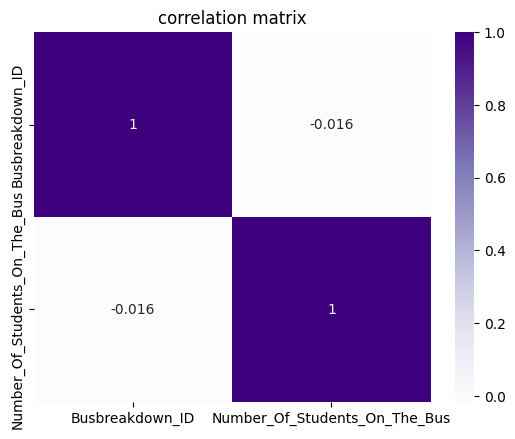

In [56]:
#corr_matrix = df.select_dtypes(exclude=['object']).columns
#correlation_matrix = df.corr(numric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='Purples')
plt.title('correlation matrix')
plt.show()

In [36]:
sns.heatmap?

<Axes: >

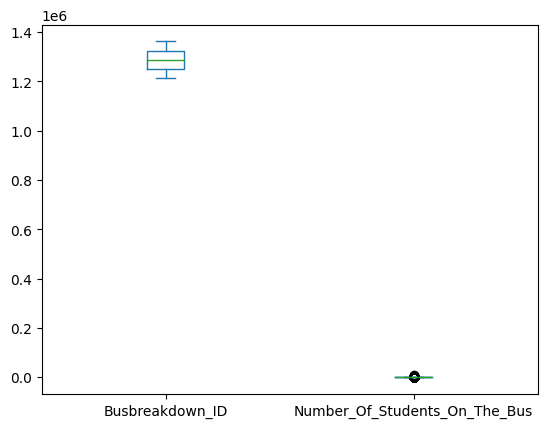

In [40]:
df[num_col].plot(kind='box')

<Axes: >

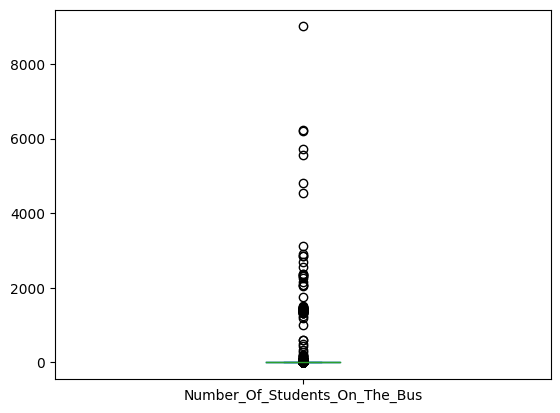

In [41]:
df['Number_Of_Students_On_The_Bus'].plot(kind='box')

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [57]:
df['Breakdown_or_Running_Late'].value_counts()

,count
Breakdown_or_Running_Late,
Running Late,130857
Breakdown,17115


In [64]:
df.dropna()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,x,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,x,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,x,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,x,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,x,09/18/2015 07:56:40 AM,Running Late,Pre-K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,...,15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,x,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,...,20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,x,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,...,20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,90323827,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,...,20 MINS,0,Yes,Yes,No,05/25/2017 04:30:00 PM,x,05/25/2017 04:30:07 PM,Breakdown,School-Age


In [61]:
null_columns = df.columns[df.isna().any()]
for i in null_columns:
  df[i].fillna(df[i].mode()[0], inplace=True)
  print(i)


Run_Type
Route_Number
Reason
Boro
How_Long_Delayed
Incident_Number


In [63]:
df.head().columns

Index(['School_Year', 'Busbreakdown_ID', 'Run_Type', 'Bus_No', 'Route_Number',
       'Reason', 'Schools_Serviced', 'Occurred_On', 'Created_On', 'Boro',
       'Bus_Company_Name', 'How_Long_Delayed', 'Number_Of_Students_On_The_Bus',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Incident_Number',
       'Last_Updated_On', 'Breakdown_or_Running_Late', 'School_Age_or_PreK'],
      dtype='object')

In [76]:
df = df.drop(['Bus_No', 'Schools_Serviced', 'Occurred_On', 'Created_On', 'Bus_Company_Name', 'Incident_Number','Busbreakdown_ID'], axis=1)
# 'School_Year',
# How_Long_Delayed

In [107]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()
df['School_Year'] = LabelEncoder.fit_transform(df['School_Year'])
df['Run_Type'] = LabelEncoder.fit_transform(df['Run_Type'])
df['Reason'] = LabelEncoder.fit_transform(df['Reason'])
df['Boro'] = LabelEncoder.fit_transform(df['Boro'])
df['How_Long_Delayed'] = LabelEncoder.fit_transform(df['How_Long_Delayed'])
df['Has_Contractor_Notified_Schools'] = LabelEncoder.fit_transform(df['Has_Contractor_Notified_Schools'])
df['Has_Contractor_Notified_Parents'] = LabelEncoder.fit_transform(df['Has_Contractor_Notified_Parents'])
df['Have_You_Alerted_OPT'] = LabelEncoder.fit_transform(df['Have_You_Alerted_OPT'])
df['Informed_On'] = LabelEncoder.fit_transform(df['Informed_On'])
df['Last_Updated_On'] = LabelEncoder.fit_transform(df['Last_Updated_On'])
df['Breakdown_or_Running_Late'] = LabelEncoder.fit_transform(df['Breakdown_or_Running_Late'])
df['School_Age_or_PreK'] = LabelEncoder.fit_transform(df['School_Age_or_PreK'])
df['Route_Number'] = LabelEncoder.fit_transform(df['Route_Number'])




In [78]:
df.head()

,School_Year,Run_Type,Route_Number,Reason,Boro,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,0,3,1,6,1,191,5,1,1,0,61017,116763,1,0
1,0,3,1,3,1,837,3,1,1,0,61329,117361,1,0
2,0,3,2,3,1,335,12,1,1,1,51829,98486,1,0
3,0,3,2,6,1,110,11,1,1,1,51656,98208,1,0
4,0,3,2,6,1,191,12,1,1,0,51836,98548,1,0


In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Number_Of_Students_On_The_Bus']] = scaler.fit_transform(df[['Number_Of_Students_On_The_Bus']])

In [80]:
	def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    Lower_bound = Q1 - (1.5 * IQR)
    Upper_bound = Q3 + (1.5 * IQR)
    return df.loc[(df[column] >= Lower_bound) & (df[column] <= Upper_bound)]

In [81]:
df = df.drop_duplicates()

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [113]:
X = df.drop(['Breakdown_or_Running_Late'], axis=1)
y = df['Breakdown_or_Running_Late']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [112]:
df.head(50)

,School_Year,Run_Type,Route_Number,Reason,Boro,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,0,3,77,6,1,191,0.025466,1,1,0,61017,116763,1,0
1,0,3,77,3,1,837,-0.010658,1,1,0,61329,117361,1,0
2,0,3,209,3,1,335,0.151898,1,1,1,51829,98486,1,0
3,0,3,209,6,1,110,0.133836,1,1,1,51656,98208,1,0
4,0,3,209,6,1,191,0.151898,1,1,0,51836,98548,1,0
5,0,7,5824,3,1,468,-0.010658,1,1,1,61839,118344,1,1
6,0,3,447,3,1,751,-0.010658,1,1,1,62213,119110,1,0
7,0,3,270,3,1,187,0.007404,1,1,0,51198,97251,1,0
8,0,7,7029,3,7,1490,-0.064843,1,1,0,51799,98418,1,1
9,0,3,35,6,2,1231,-0.064843,1,1,0,62335,119295,1,0


## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [122]:
model= Sequential()

model.add(Dense(units=6, activation='relu', input_shape=(13,)))
model.add(Dense(units=4, activation='relu'))
Flatten()
Dropout(0.25)
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 6)                   │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 4)                   │              28 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117 (468.00 B)

 Trainable params: 117 (468.00 B)

 Non-trainable params: 0 (0.00 B)

In [138]:
# #### second way ## dont't RUN the code after you run above code.
model= Sequential()

model.add(Dense(units=2, activation='relu', input_shape=(13,)))
model.add(Dense(units=2, activation='relu'))
Flatten()
Dropout(0.25)
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                     │ (None, 2)                   │              28 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [125]:
model.compile( optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [139]:
# second way
model.compile( optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [126]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
3699/3699 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8031 - loss: 22.2619
Epoch 2/20
3699/3699 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8848 - loss: 0.3655
Epoch 3/20
3699/3699 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8868 - loss: 0.3518
Epoch 4/20
3699/3699 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8843 - loss: 0.3584
Epoch 5/20
3699/3699 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8859 - loss: 0.3546
Epoch 6/20
3699/3699 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8845 - loss: 0.3583
Epoch 7/20
3699/3699 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8856 - loss: 0.3541
Epoch 8/20
3699/3699 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8845 - loss: 0.3530
Epoch 9/20
3699/3699 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8852 - loss: 0.3544
Epoch 10/20
3699/3699 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8864 - loss: 0.3509
Epoch 11/20
3699/3699 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8866 - loss: 0.3531
Epoch 12/20
3699/3699 ━

In [140]:
# second way
history = model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
3699/3699 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8481 - loss: 1.6051
Epoch 2/20
3699/3699 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8865 - loss: 0.3404
Epoch 3/20
3699/3699 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8848 - loss: 0.3341
Epoch 4/20
3699/3699 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8848 - loss: 0.3328
Epoch 5/20
3699/3699 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8845 - loss: 0.3334
Epoch 6/20
3699/3699 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8845 - loss: 0.3316
Epoch 7/20
3699/3699 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8829 - loss: 0.3332
Epoch 8/20
3699/3699 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8855 - loss: 0.3268
Epoch 9/20
3699/3699 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8852 - loss: 0.3265
Epoch 10/20
3699/3699 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8847 - loss: 0.3260
Epoch 11/20
3699/3699 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8860 - loss: 0.3223
Epoch 12/20
3699/3699 ━━━━

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [134]:
import numpy as np
np.argmax(y_pred, axis=1)

array([0, 0, 0, ..., 0, 0, 0])

In [135]:
len(y_pred)

29588

In [141]:
y_pred = model.predict(X_test)

925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [151]:
predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)


925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [154]:
model.evaluate(predict_x, y_test)

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_33" is incompatible with the layer: expected axis -1 of input shape to have value 13, but received input with shape (None, 1)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 1), dtype=float32)
  • training=False
  • mask=None

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [136]:
model.predict(X_test)

925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.86945176],
       [0.86945176],
       [0.86945176],
       ...,
       [0.86945176],
       [0.86945176],
       [0.86945176]], dtype=float32)

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

<Axes: >

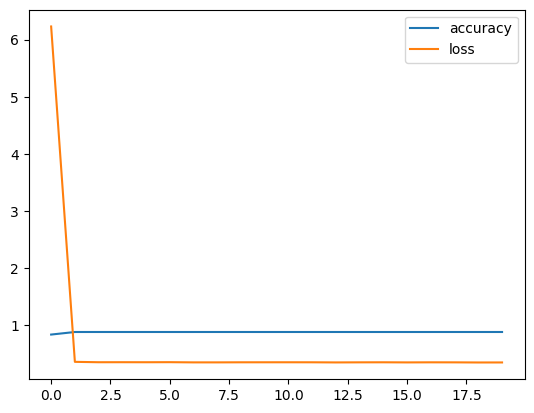

In [137]:
pd.DataFrame(history.history).plot()

<Axes: >

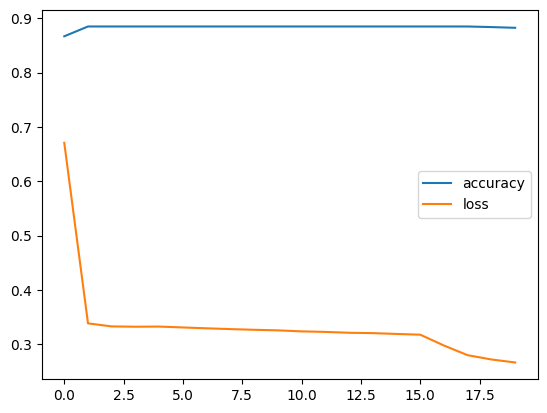

In [148]:
#  second way
pd.DataFrame(history.history).plot()

## Save the Model
Save the trained model for submission.

In [133]:
model.save('my_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

1- in data preprocessing I use Label encoding since the one hot encoding will take too much ram in my laptop, and it's faster to showing the result, I know it's not the best way, And I drop the columns that not benifit to our data in my prospective, some of them is annoying and have alot of missing value.

2-the reasoning behind the model architecture :
the number of layers = since it's not large to prevent overfitting
type of layers = Dense, it's good for ANN
number of neurons = it's based on how you to try the model to get the best result.
activation functions = I use relu since the output of the nodes it will be between 0 and 1, it's usually useing it.

3-batch size= it's usually used 32.
 number of epochs = I can run for 100 or more, bys this might be cause overfitting, 20 is good.
 optimizer = I ise adam, it's usually used.
 How did these choices affect the training process = we can try and edit it more than once to discover the best results.

4- loss function and evaluation metrics = I use binary crossentropy since the calss here is one class,
this is used for classification.

5- I used regularization techniques s dropout it's y influenced the model performance by prevent overfitting.

6- Model Evaluation: I try to see the accuracy of the deffrent between the predict values, and the test values of y.

7- Model Tuning: I don't thinl I use model tuning.

8- it's the model looks like overfitting, we should be dropout more data, or change the layers input and hiddin layers
this might be a good solution.